In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

dataset = pd.read_csv('Mall_Customers.csv')
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [10]:
fields = dataset.iloc[:, [3, 4]].values
print(fields)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

In [11]:
wcss = []
for index in range(1, 11):
    kmeans = KMeans(n_clusters=index, init='k-means++', random_state=2)
    kmeans.fit(fields)
    wcss.append(kmeans.inertia_)

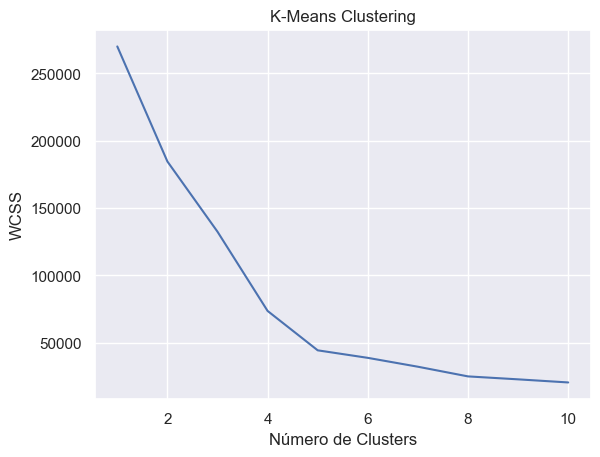

In [12]:
# Graficación del "Codo de Jambú"

sns.set()
plt.plot(range(1, 11), wcss)
plt.title('K-Means Clustering')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS') # Weighted Cluster Sum of Squares
plt.show()

In [13]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
cluster_values = kmeans.fit_predict(fields) # Predicción de los clusters
print(cluster_values)

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


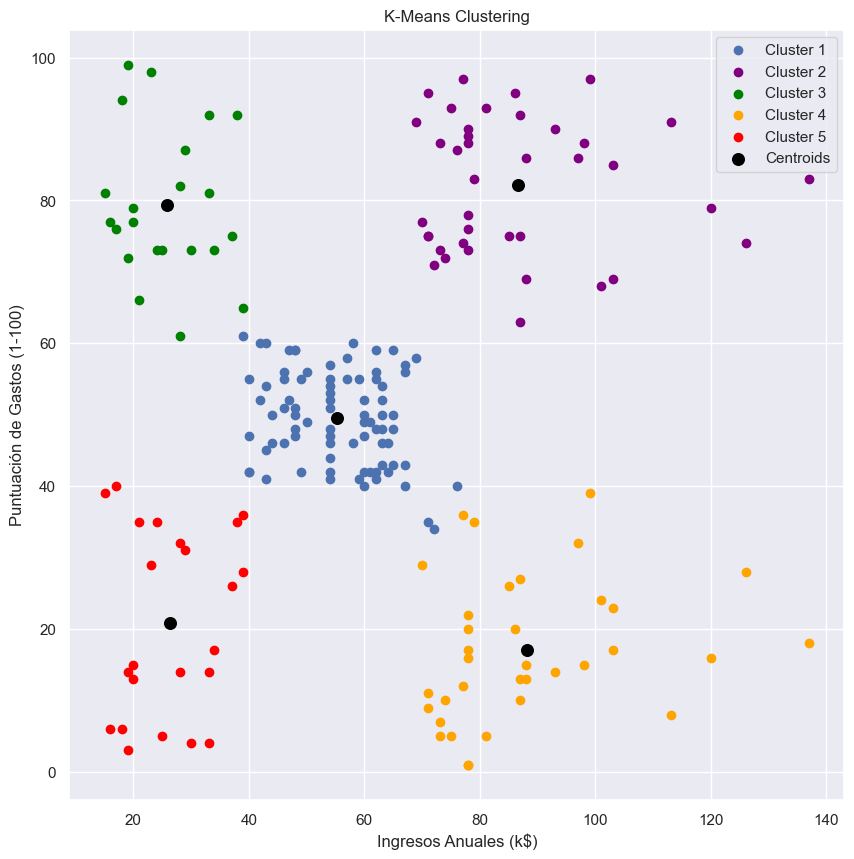

In [14]:
# Graficación de los clusters

plt.figure(figsize=(10, 10))
plt.scatter(fields[cluster_values == 0, 0], fields[cluster_values == 0, 1], c='b', label='Cluster 1')
plt.scatter(fields[cluster_values == 1, 0], fields[cluster_values == 1, 1], c='purple', label='Cluster 2')
plt.scatter(fields[cluster_values == 2, 0], fields[cluster_values == 2, 1], c='green', label='Cluster 3')
plt.scatter(fields[cluster_values == 3, 0], fields[cluster_values == 3, 1], c='orange', label='Cluster 4')
plt.scatter(fields[cluster_values == 4, 0], fields[cluster_values == 4, 1], c='red', label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=70, c='black', label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel('Ingresos Anuales (k$)')
plt.ylabel('Puntuación de Gastos (1-100)')
plt.legend()

## Para localizar de manera eficiente el numero optimo de clusters

In [15]:
# Criterio de silueta (Silhouette Score)

from sklearn import datasets
from sklearn.metrics import silhouette_score

In [26]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

x = dataset.iloc[:, [3, 4]].to_numpy()
max_score = -1
best_j = 0

for j in range(2, 12):
    kmeans = KMeans(n_clusters=j, init='k-means++', random_state=42)
    kmeans.fit_predict(x)
    # Calculamos el Silhouette Score
    score = silhouette_score(x, kmeans.labels_, metric='euclidean')
    print('Número de clusters =', j, 'Silhouette Score =', score)
    
    if score > max_score:
        max_score = score
        best_j = j

print('\nEl mejor número de clusters es =', best_j, 'con un Silhouette Score de =', max_score)

Número de clusters = 2 Silhouette Score = 0.39564531743995546
Número de clusters = 3 Silhouette Score = 0.46761358158775435
Número de clusters = 4 Silhouette Score = 0.4937945814354117
Número de clusters = 5 Silhouette Score = 0.553931997444648
Número de clusters = 6 Silhouette Score = 0.5128405328004378
Número de clusters = 7 Silhouette Score = 0.5017174409749505
Número de clusters = 8 Silhouette Score = 0.4962769338093321
Número de clusters = 9 Silhouette Score = 0.45587414130065596
Número de clusters = 10 Silhouette Score = 0.4426214845978157
Número de clusters = 11 Silhouette Score = 0.41413838935154096

El mejor número de clusters es = 5 con un Silhouette Score de = 0.553931997444648


## Agregar 3 columnas en vez de solo dos
### se puede usar para agregar N de columnas

In [27]:
# Algoritmo KMeans aplicado a 3 columnas de nuestra base original
# bajo una transformación de PCA

fields2 = dataset.iloc[:, [2, 3, 4]].values
print(fields2)

[[ 19  15  39]
 [ 21  15  81]
 [ 20  16   6]
 [ 23  16  77]
 [ 31  17  40]
 [ 22  17  76]
 [ 35  18   6]
 [ 23  18  94]
 [ 64  19   3]
 [ 30  19  72]
 [ 67  19  14]
 [ 35  19  99]
 [ 58  20  15]
 [ 24  20  77]
 [ 37  20  13]
 [ 22  20  79]
 [ 35  21  35]
 [ 20  21  66]
 [ 52  23  29]
 [ 35  23  98]
 [ 35  24  35]
 [ 25  24  73]
 [ 46  25   5]
 [ 31  25  73]
 [ 54  28  14]
 [ 29  28  82]
 [ 45  28  32]
 [ 35  28  61]
 [ 40  29  31]
 [ 23  29  87]
 [ 60  30   4]
 [ 21  30  73]
 [ 53  33   4]
 [ 18  33  92]
 [ 49  33  14]
 [ 21  33  81]
 [ 42  34  17]
 [ 30  34  73]
 [ 36  37  26]
 [ 20  37  75]
 [ 65  38  35]
 [ 24  38  92]
 [ 48  39  36]
 [ 31  39  61]
 [ 49  39  28]
 [ 24  39  65]
 [ 50  40  55]
 [ 27  40  47]
 [ 29  40  42]
 [ 31  40  42]
 [ 49  42  52]
 [ 33  42  60]
 [ 31  43  54]
 [ 59  43  60]
 [ 50  43  45]
 [ 47  43  41]
 [ 51  44  50]
 [ 69  44  46]
 [ 27  46  51]
 [ 53  46  46]
 [ 70  46  56]
 [ 19  46  55]
 [ 67  47  52]
 [ 54  47  59]
 [ 63  48  51]
 [ 18  48  59]
 [ 43  48 

In [28]:
from  sklearn import decomposition

pca = decomposition.PCA(n_components=2)
pca.fit(fields2)
fields2 = pca.transform(fields2)
fields2

array([[-3.18705078e+01, -3.30014253e+01],
       [ 7.63396908e-01, -5.68438653e+01],
       [-5.74087256e+01, -1.31229362e+01],
       [-2.16989648e+00, -5.34779049e+01],
       [-3.21749197e+01, -3.03870050e+01],
       [-2.17827777e+00, -5.22265808e+01],
       [-5.90660565e+01, -9.54170669e+00],
       [ 1.23693261e+01, -6.16176843e+01],
       [-6.63156568e+01, -3.21359934e+00],
       [-5.65677534e+00, -4.72664534e+01],
       [-5.82366179e+01, -9.13375312e+00],
       [ 1.46202592e+01, -6.21072940e+01],
       [-5.51612126e+01, -1.00779778e+01],
       [-4.30660584e-03, -5.01134367e+01],
       [-5.27647474e+01, -1.16804199e+01],
       [ 1.94563480e+00, -5.15231943e+01],
       [-3.45062349e+01, -2.37600734e+01],
       [-7.30573032e+00, -4.35158724e+01],
       [-4.12574933e+01, -1.64734320e+01],
       [ 1.61888268e+01, -5.82998775e+01],
       [-3.27403118e+01, -2.13349462e+01],
       [-9.82702739e-01, -4.44533143e+01],
       [-5.78102821e+01, -1.86854579e+00],
       [-1.

In [29]:
wcss2 = []
for index in range(1, 11):
    kmeans = KMeans(n_clusters=index, init='k-means++', random_state=2)
    kmeans.fit(fields2)
    wcss2.append(kmeans.inertia_)

Text(0, 0.5, 'WCSS')

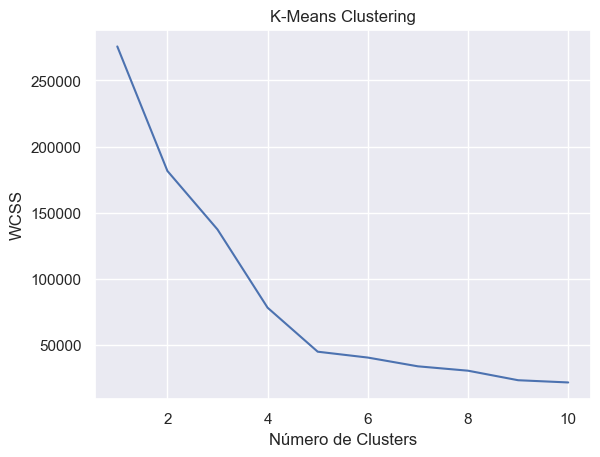

In [30]:
sns.set()
plt.plot(range(1, 11), wcss2)
plt.title('K-Means Clustering')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS') # Weighted Cluster Sum of Squares

In [31]:
# Realizar la predicción de los clusters

kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
cluster_values = kmeans.fit_predict(fields2) # Predicción de los clusters
print(cluster_values)

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


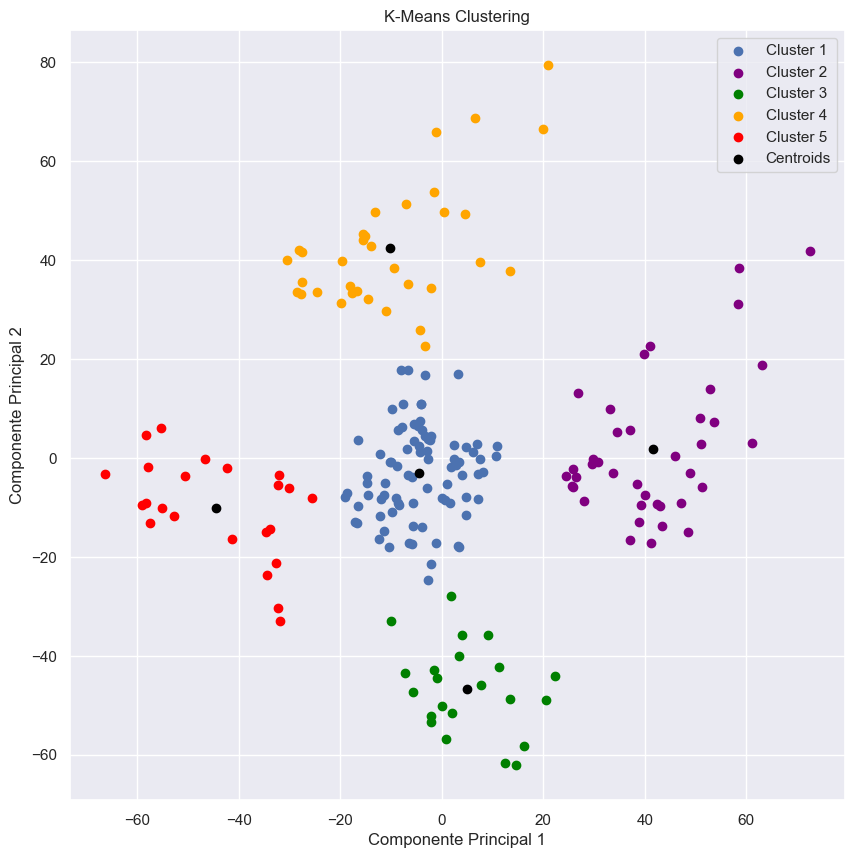

In [32]:
# Graficación de los clusters con centroides

plt.figure(figsize=(10, 10))
plt.scatter(fields2[cluster_values == 0, 0], fields2[cluster_values == 0, 1], c='b', label='Cluster 1')
plt.scatter(fields2[cluster_values == 1, 0], fields2[cluster_values == 1, 1], c='purple', label='Cluster 2')
plt.scatter(fields2[cluster_values == 2, 0], fields2[cluster_values == 2, 1], c='green', label='Cluster 3')
plt.scatter(fields2[cluster_values == 3, 0], fields2[cluster_values == 3, 1], c='orange', label='Cluster 4')
plt.scatter(fields2[cluster_values == 4, 0], fields2[cluster_values == 4, 1], c='red', label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='black', label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()